<a href="https://colab.research.google.com/github/jovan67/mine/blob/main/log_reg_testing_nba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General info
# holdout set is from 2014 & was not included in the same table as the train/test data to ensure no data leakage occurs
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=TlTQJlXJ6jSBVHwviXnWRaydASk3Vq&prompt=consent&token_usage=remote&access_type=offline&code_challenge=M6XN8zY4AC_kR_K89RWWEdoRjrjy9NTbQkDzM5-hsKI&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0ATx3LY68HbauRgrDtKJ2XAQAIsauEwELCC-YEJ-99RtvQn9E_h63VEGTJOpB8F0OJsi3MQ

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

In [ ]:
import pandas as pd

In [ ]:
from google.cloud import bigquery
project_id = 'jovial-sound-411720'
client = bigquery.Client(project = project_id)
#running a query to retrieve the train/test data
sql_query1 = """
    SELECT
    Team,
    ORB,
    DRB,
    TOV,
    BLK,
    ORtg,
    FG,
    FT,
    eFG_,
    FT_,
    W_L_
    FROM `jovial-sound-411720.nba_analysis.stats_2010_2013`
"""
#converting query results to a dataframe
test_train_data = client.query_and_wait(sql_query1).to_dataframe()

/usr/local/lib/python3.10/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [ ]:
sql_query2 = '''
SELECT
  Team,
  ORB,
  DRB,
  TOV,
  BLK,
  ORtg,
  FG,
  FT,
  eFG_,
  FT_,
  W_L_
FROM `jovial-sound-411720.nba_analysis.stats_2013_2014`

'''
holdout_data = client.query_and_wait(sql_query2).to_dataframe()
holdout_data

,Team,ORB,DRB,TOV,BLK,ORtg,FG,FT,eFG_,FT_,W_L_
0,DAL,15,28,15,0,115.3,34,28,0.500,0.848,0
1,MIA,7,24,19,0,110.8,42,10,0.588,0.769,0
2,SAS,15,32,18,0,90.1,29,25,0.361,0.926,0
3,DAL,11,28,11,1,120.4,45,10,0.580,0.714,0
4,DAL,7,27,10,1,92.2,32,10,0.449,0.556,0
...,...,...,...,...,...,...,...,...,...,...,...
323,OKC,13,47,17,11,126.3,45,28,0.579,0.933,1
324,SAS,9,37,13,11,107.5,37,13,0.532,0.650,1
325,MIA,12,26,17,12,107.1,38,17,0.525,0.850,1
326,OKC,8,39,11,12,121.6,44,23,0.567,0.852,1


In [ ]:
test_train_data

,Team,ORB,DRB,TOV,BLK,ORtg,FG,FT,eFG_,FT_,W_L_
0,DAL,9,29,13,3,81.9,24,16,0.365,0.696,0
1,MIA,6,33,22,10,82.6,24,25,0.419,0.658,0
2,MIA,7,24,22,5,75.9,24,18,0.388,0.750,0
3,MIA,12,30,21,2,92.5,25,29,0.396,0.829,0
4,SAS,5,27,11,0,85.4,25,18,0.391,0.720,0
...,...,...,...,...,...,...,...,...,...,...,...
915,MIA,8,35,9,4,124.7,51,8,0.606,0.727,1
916,SAS,11,29,13,8,135.6,51,17,0.661,0.810,1
917,SAS,9,34,19,6,125.3,51,19,0.661,0.826,1
918,MIA,8,33,12,9,128.6,56,19,0.604,0.792,1


In [ ]:
#creating dummies for both training/train & holdout set
test_train_data['Team'] = test_train_data['Team'].astype('category')
test_train_data['Team'] = test_train_data['Team'].cat.codes
holdout_data['Team'] = holdout_data['Team'].astype('category')
holdout_data['Team'] = holdout_data['Team'].cat.codes
holdout_data

,Team,ORB,DRB,TOV,BLK,ORtg,FG,FT,eFG_,FT_,W_L_
0,0,15,28,15,0,115.3,34,28,0.500,0.848,0
1,1,7,24,19,0,110.8,42,10,0.588,0.769,0
2,3,15,32,18,0,90.1,29,25,0.361,0.926,0
3,0,11,28,11,1,120.4,45,10,0.580,0.714,0
4,0,7,27,10,1,92.2,32,10,0.449,0.556,0
...,...,...,...,...,...,...,...,...,...,...,...
323,2,13,47,17,11,126.3,45,28,0.579,0.933,1
324,3,9,37,13,11,107.5,37,13,0.532,0.650,1
325,1,12,26,17,12,107.1,38,17,0.525,0.850,1
326,2,8,39,11,12,121.6,44,23,0.567,0.852,1


In [ ]:
#model building now, training set
x_values = test_train_data.drop(columns=['W_L_'])
y_values = test_train_data['W_L_']

In [ ]:
#splitting and training the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.3, random_state = 2)
x_train

,Team,ORB,DRB,TOV,BLK,ORtg,FG,FT,eFG_,FT_
678,0,10,29,12,1,129.7,41,24,0.589,0.923
363,2,5,35,13,9,103.2,34,20,0.507,0.741
108,3,10,36,8,8,92.1,33,14,0.404,0.737
787,1,9,27,12,4,126.0,43,19,0.591,0.826
304,1,8,25,13,8,105.0,31,26,0.434,0.897
...,...,...,...,...,...,...,...,...,...,...
534,1,4,29,18,6,111.6,38,19,0.618,0.731
584,1,12,29,9,5,119.5,39,23,0.512,0.793
493,3,8,37,14,5,116.8,37,16,0.600,0.727
527,1,9,39,10,7,103.4,38,11,0.494,0.786


In [ ]:
#Normalizing data points
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 9).fit(x_train_scaled, y_train)
y_pred = log_reg.predict(x_test_scaled)
y_pred

array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1.

In [ ]:
log_reg.score(x_test_scaled, y_test)

0.8115942028985508

In [ ]:
log_reg.score(x_train_scaled, y_train)

0.860248447204969

In [ ]:
#testing with the validation data that wasn't included in the original data set
x_holdout = holdout_data.drop(columns=['W_L_'])
y_holdout = holdout_data['W_L_']

In [ ]:
x_holdout_scaled =  scaler.transform(x_holdout)

In [ ]:
log_reg.score(x_holdout_scaled, y_holdout)

0.8170731707317073

In [ ]:
y_pred2 = log_reg.predict(x_holdout_scaled)
y_pred2

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_holdout, y_pred2)
cnf_matrix

array([[ 65,  39],
       [ 21, 203]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['lost game', 'won game']
print(classification_report(y_holdout, y_pred2)) #can add target_names after, try to find a way to visualize this

              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68       104
         1.0       0.84      0.91      0.87       224

    accuracy                           0.82       328
   macro avg       0.80      0.77      0.78       328
weighted avg       0.81      0.82      0.81       328



<Axes: >

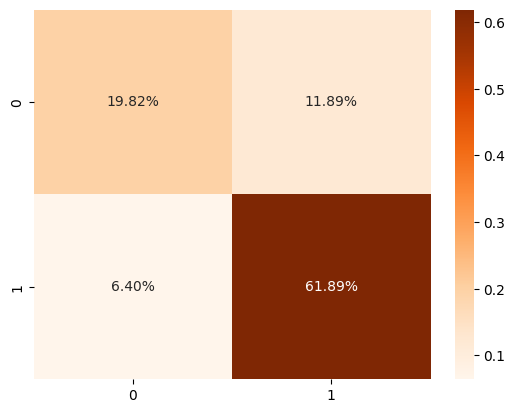

In [ ]:
import seaborn as sns
import numpy as np
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot= True,
            fmt='.2%', cmap='Oranges')